In [3]:
import torch
import librosa
import os
import sys
import numpy as np
import pandas as pd

sys.path.append('../Datasets/')
sys.path.append('../models/')
import datasets
import models
import audio_utils

In [21]:
SCAPPER_CSV = '../Datasets/scrapper_test_dataset.csv'
SCAPPER_AUD_DIR = '../../audioData/sythenticSoundscenes/test/'
SCAPPER_DF = pd.read_csv(SCAPPER_CSV)

scapper_scenes = SCAPPER_DF['acoustic_scene_label'].unique()

In [22]:
def get_data(audioFname):
    audio = audio_utils.load_audio_from_file(audioFname)
    log_mel_spectrogram = audio_utils.get_log_melSpectrogram(audio)
    return log_mel_spectrogram

In [23]:
model = models.ASC_Model00(return_second_last=False)
model.load_state_dict(torch.load('../ASC_Model00_scapper_20epochs_00_statedict.pt'))

<All keys matched successfully>

In [24]:
import os

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)
output_list = []

model.eval()
for index, row in SCAPPER_DF.iterrows():
    audioFname = SCAPPER_AUD_DIR + row['audio_fileNames']
    audio = get_data(audioFname)
    audio = audio.to(device)
    audio = audio.unsqueeze(0)
    output = model(audio)
    output = scapper_scenes[torch.argmax(torch.sigmoid(output.cpu()))]
    output_list.append(output)
    print(output)

office
office
office
bus
office
office
office
bus
bus
bus
bus
office
office
bus
office
office
bus
office
bus
office
bus
office
office
bus
office
office
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
office
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
office
park
park
office
office
office
office
office
office
park
bus
office
bus
office
office
office
restaurant
office
bus
bus
bus
bus
bus
office
office
bus
bus
office
bus
park
office
office
restaurant
office
office
office
park
office
office
bus
restaurant
office
restaurant
office
restaurant
office
supermarket
office
office
supermarket
bus
bus
bus
office
bus
park
bus
office
office
bus
bus
bus
office
office
bus
bus
bus
bus
bus
bus
bus
bus
office
office
bus
bus
office
office
bus
bus
bus
bus
office
office
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
bus
office
bus
office
bus
bus
office
offic

In [25]:
SCAPPER_DF['ASC_predictions_model00'] = output_list

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(SCAPPER_DF['acoustic_scene_label'], SCAPPER_DF['ASC_predictions_model00'], rownames=['acoustic_scene_label'], colnames=['ASC_predictions_model00'])

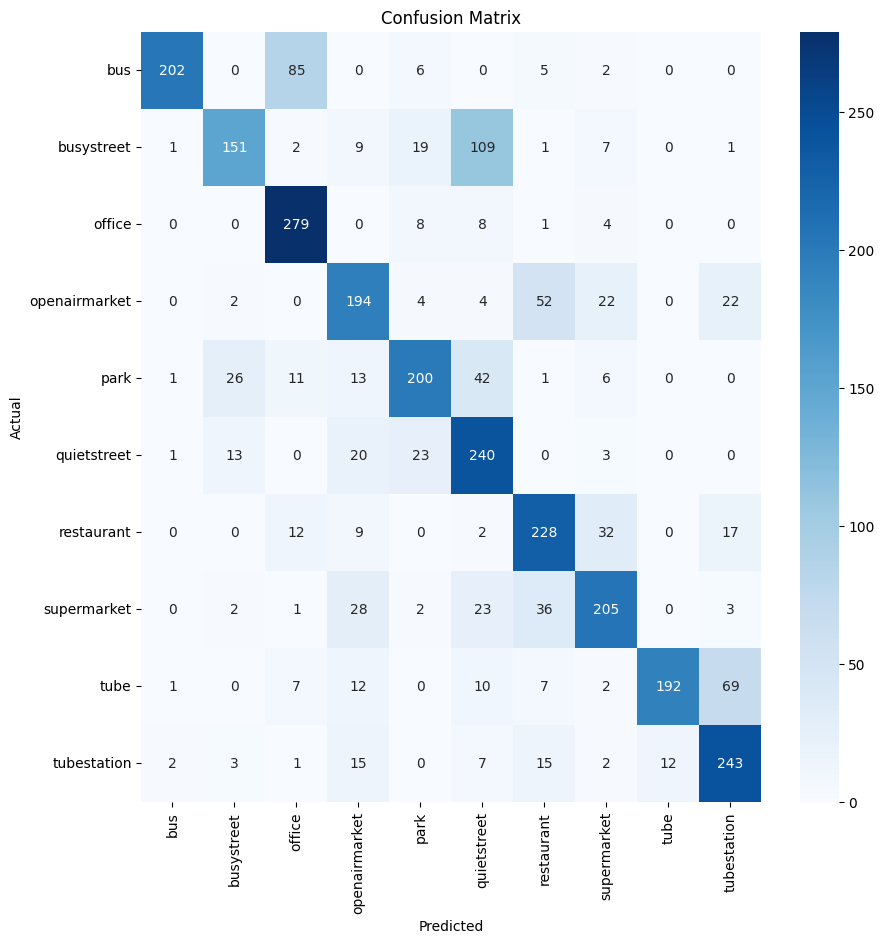

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()